In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
df_train = pd.read_csv("/content/DailyDelhiClimateTrain.csv")
df_test = pd.read_csv("/content/DailyDelhiClimateTest.csv")

In [26]:
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [27]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [29]:
df_train.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


Here dataset has no missing values

In [30]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

print(df_train.info())
print(" ")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB
None
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          114 non-null    datetime64[ns]
 1   meantemp      114 non-null    float64       
 2   humidity      114 non-null    float64       
 3   wind_speed    114 non-null    float64       
 4   meanpressure  114 non-null    float64       
dtypes: datetime64[ns](

visualzing mean over the time

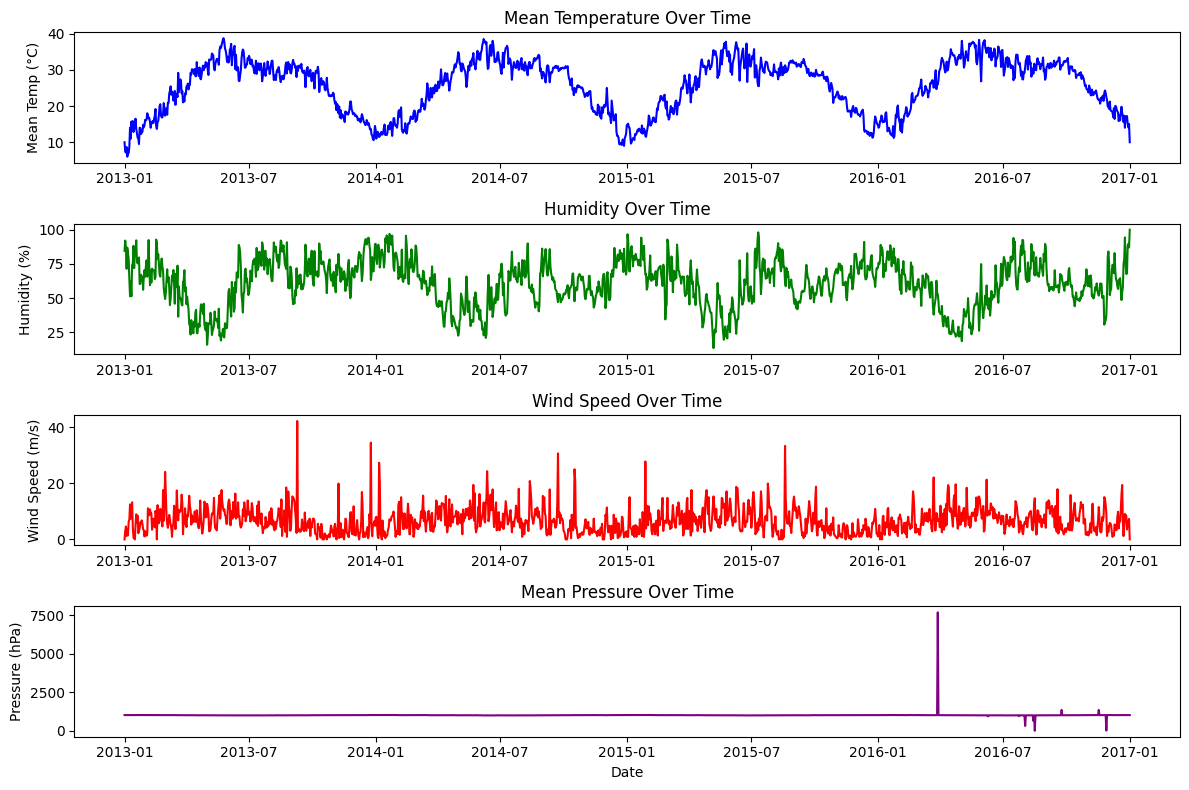

In [31]:
plt.figure(figsize= (12,8))
plt.subplot(4,1,1)
plt.plot(df_train['date'], df_train['meantemp'], label='Mean Temperature', color='blue')
plt.title('Mean Temperature Over Time')
plt.ylabel('Mean Temp (°C)')

plt.subplot(4, 1, 2)
plt.plot(df_train['date'], df_train['humidity'], label='Humidity', color='green')
plt.title('Humidity Over Time')
plt.ylabel('Humidity (%)')

plt.subplot(4, 1, 3)
plt.plot(df_train['date'], df_train['wind_speed'], label='Wind Speed', color='red')
plt.title('Wind Speed Over Time')
plt.ylabel('Wind Speed (m/s)')

plt.subplot(4, 1, 4)
plt.plot(df_train['date'], df_train['meanpressure'], label='Mean Pressure', color='purple')
plt.title('Mean Pressure Over Time')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

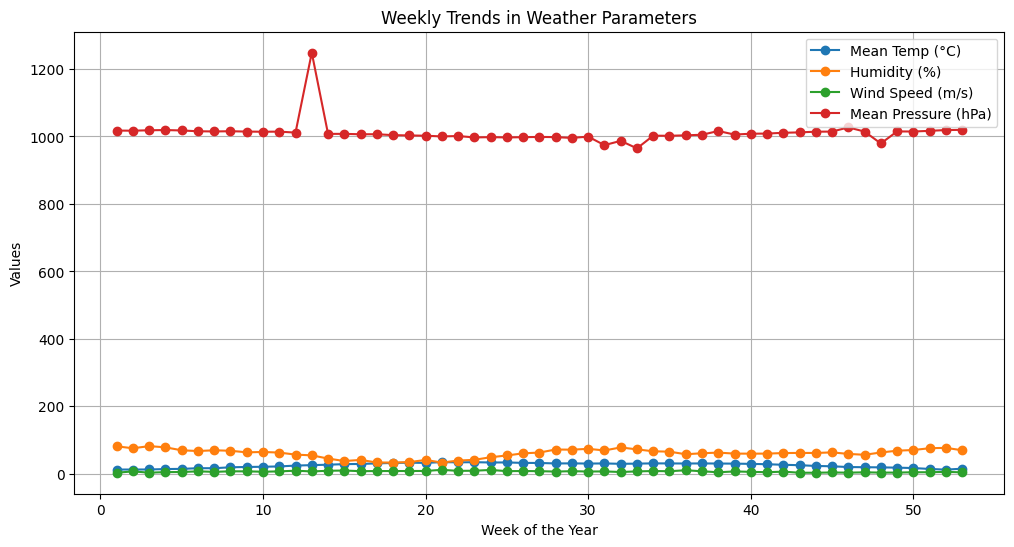

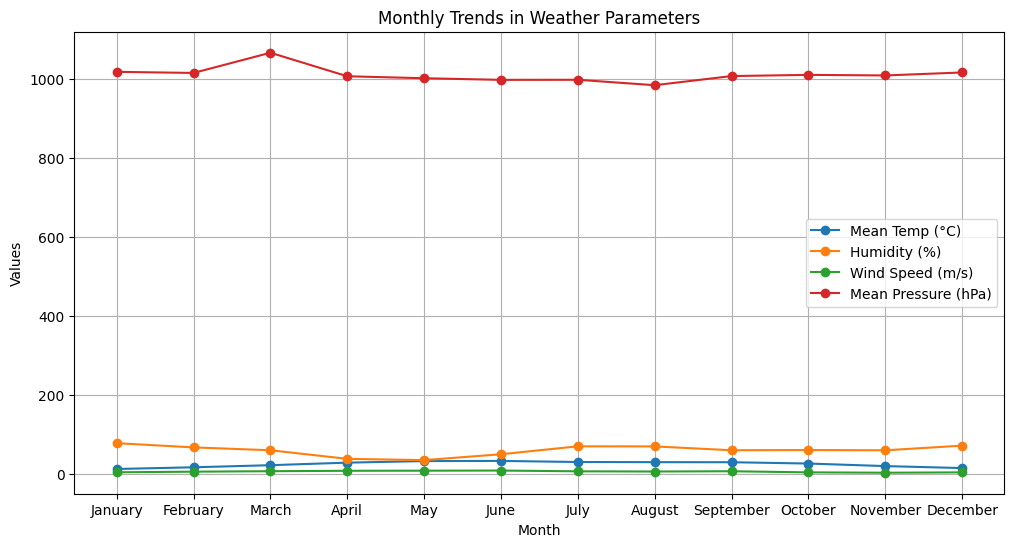

In [32]:

# Grouping data by week and month, calculating mean values for trends
df_train['week'] = df_train['date'].dt.isocalendar().week
df_train['month_name'] = df_train['date'].dt.month_name()

# Weekly trends
weekly_trends = df_train.groupby('week').mean(numeric_only=True)

# Monthly trends
monthly_trends = df_train.groupby('month_name').mean(numeric_only=True)

# Sort months in calendar order for visualization
calendar_order = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
monthly_trends = monthly_trends.reindex(calendar_order)

# Plotting Weekly Trends
plt.figure(figsize=(12, 6))
plt.plot(weekly_trends.index, weekly_trends['meantemp'], label='Mean Temp (°C)', marker='o')
plt.plot(weekly_trends.index, weekly_trends['humidity'], label='Humidity (%)', marker='o')
plt.plot(weekly_trends.index, weekly_trends['wind_speed'], label='Wind Speed (m/s)', marker='o')
plt.plot(weekly_trends.index, weekly_trends['meanpressure'], label='Mean Pressure (hPa)', marker='o')
plt.title('Weekly Trends in Weather Parameters')
plt.xlabel('Week of the Year')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

# Plotting Monthly Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends['meantemp'], label='Mean Temp (°C)', marker='o')
plt.plot(monthly_trends.index, monthly_trends['humidity'], label='Humidity (%)', marker='o')
plt.plot(monthly_trends.index, monthly_trends['wind_speed'], label='Wind Speed (m/s)', marker='o')
plt.plot(monthly_trends.index, monthly_trends['meanpressure'], label='Mean Pressure (hPa)', marker='o')
plt.title('Monthly Trends in Weather Parameters')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


after analyise all things, move to prediction

In [33]:
# Extract date components
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

# Add lag features
df_train['meantemp_lag1'] = df_train['meantemp'].shift(1)
df_train['humidity_lag1'] = df_train['humidity'].shift(1)

# Drop rows with missing values caused by lag features
train_data_cleaned = df_train.dropna(subset=['meantemp_lag1', 'humidity_lag1'])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

Mean Absolute Error (MAE): 0.94°C
Mean Squared Error (MSE): 1.55°C²


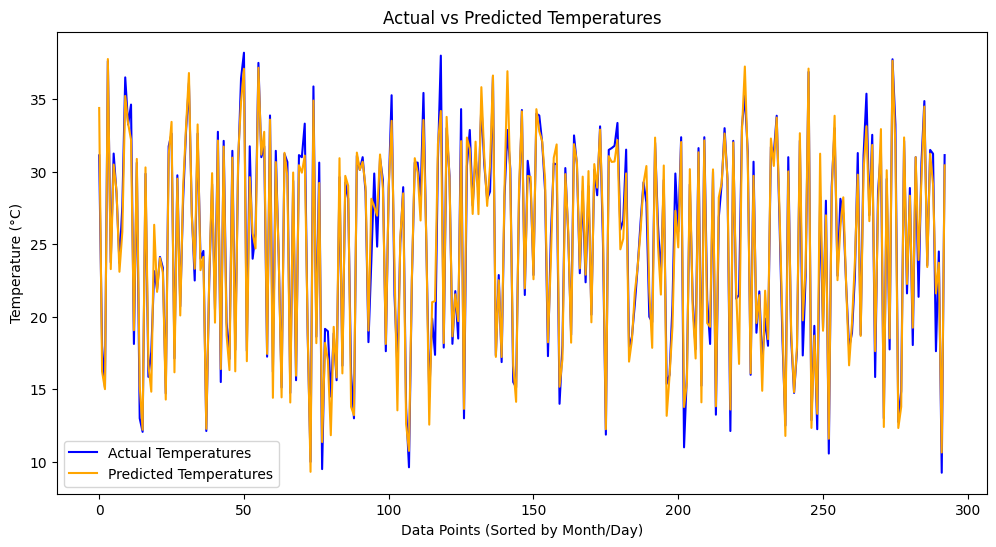

In [35]:
train_data_cleaned = df_train.dropna(subset=['meantemp_lag1', 'humidity_lag1'])

target = 'meantemp'
features = ['humidity', 'wind_speed', 'meanpressure', 'month', 'day', 'meantemp_lag1', 'humidity_lag1']

X = train_data_cleaned[features]
y = train_data_cleaned[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}°C")
print(f"Mean Squared Error (MSE): {mse:.2f}°C²")

X_val['actual'] = y_val
X_val['predicted'] = y_pred

plt.figure(figsize=(12, 6))
plt.plot(X_val['actual'].values, label='Actual Temperatures', color='blue')
plt.plot(X_val['predicted'].values, label='Predicted Temperatures', color='orange')
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Data Points (Sorted by Month/Day)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

<ipython-input-36-d423956481cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['month'] = train_data_cleaned['month']
<ipython-input-36-d423956481cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['year'] = train_data_cleaned['year']


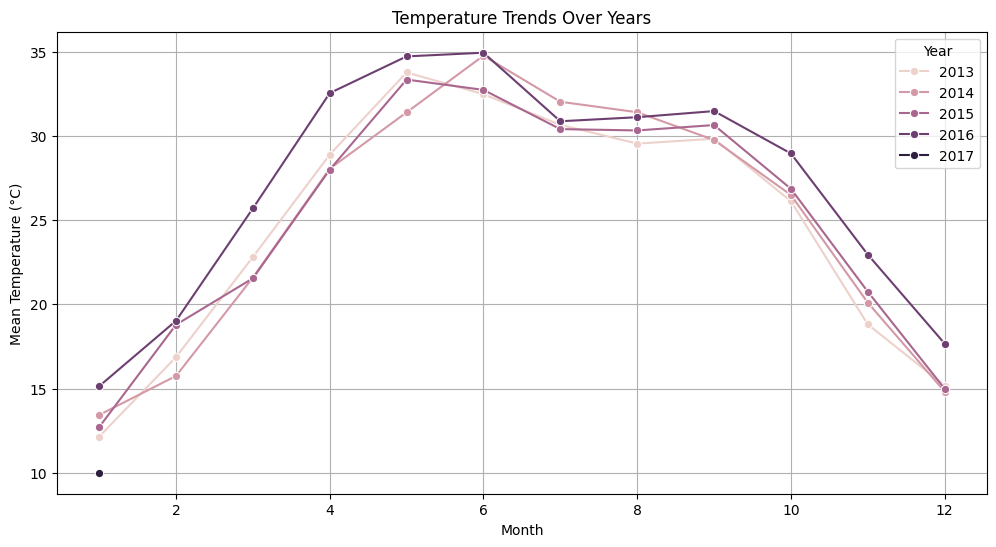

In [36]:
import seaborn as sns

train_data_cleaned['month'] = train_data_cleaned['month']
train_data_cleaned['year'] = train_data_cleaned['year']

monthly_data = train_data_cleaned.groupby(['year', 'month'])['meantemp'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='month', y='meantemp', hue='year', marker='o')

plt.title('Temperature Trends Over Years')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.legend(title='Year')
plt.grid(True)
plt.show()
